In [61]:
from sklearn.model_selection import train_test_split
from preamble import *
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib as plt
import mglearn
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.plotly as py
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
   

In [62]:


df = pd.read_csv("C:/Users/Kapila/Desktop/Macquarie coursework/COMP777 Computing Methods of Research/Final Project/Dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv") #Reading the dataset in a dataframe using Pandas

df.loc[df['shares'] < 1400, 'split'] = 'Unpopular'
df.loc[df['shares'] >= 1400, 'split'] = 'Popular'

df['split']

0        Unpopular
1          Popular
2        Unpopular
3        Unpopular
4        Unpopular
5        Unpopular
6        Unpopular
7        Unpopular
8          Popular
9        Unpopular
10         Popular
11         Popular
12       Unpopular
13         Popular
14       Unpopular
15         Popular
16         Popular
17         Popular
18         Popular
19         Popular
20         Popular
21       Unpopular
22       Unpopular
23         Popular
24       Unpopular
25       Unpopular
26         Popular
27         Popular
28       Unpopular
29       Unpopular
           ...    
39614      Popular
39615      Popular
39616      Popular
39617    Unpopular
39618      Popular
39619    Unpopular
39620      Popular
39621      Popular
39622      Popular
39623    Unpopular
39624      Popular
39625      Popular
39626    Unpopular
39627    Unpopular
39628    Unpopular
39629      Popular
39630      Popular
39631    Unpopular
39632      Popular
39633      Popular
39634    Unpopular
39635    Unp

In [63]:
df.shape


(39644, 62)

In [64]:
df.head()
list(df.columns.values)

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

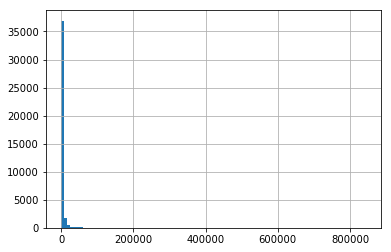

In [79]:
df['shares'].hist(bins=100)

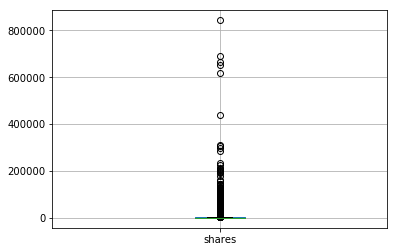

In [66]:
df.boxplot(column='shares')

In [67]:
#removing the attributes url and timedelta which are non predictive variables
dfr12 = df.iloc[:, 2:60]
print(dfr12)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  12               219             0.66               1.0   
1                   9               211             0.58               1.0   
2                   9               255             0.60               1.0   
3                   9               531             0.50               1.0   
4                  13              1072             0.42               1.0   
5                  10               370             0.56               1.0   
6                   8               960             0.42               1.0   
7                  12               989             0.43               1.0   
8                  11                97             0.67               1.0   
9                  10               231             0.64               1.0   
10                  9              1248             0.49               1.0   
11                 10               187             0.67        

In [68]:
data=dfr12

In [69]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.66,1.0,...,0.50,-0.19,0.00,0.19
1,9,211,0.58,1.0,...,0.00,0.00,0.50,0.00
2,9,255,0.60,1.0,...,0.00,0.00,0.50,0.00
3,9,531,0.50,1.0,...,0.00,0.00,0.50,0.00
4,13,1072,0.42,1.0,...,0.45,0.14,0.05,0.14


In [70]:
target=  df.iloc[:,61]

In [71]:
target.head()

0    Unpopular
1      Popular
2    Unpopular
3    Unpopular
4    Unpopular
Name: split, dtype: object

In [72]:
print(target)

0        Unpopular
1          Popular
2        Unpopular
3        Unpopular
4        Unpopular
5        Unpopular
6        Unpopular
7        Unpopular
8          Popular
9        Unpopular
10         Popular
11         Popular
12       Unpopular
13         Popular
14       Unpopular
15         Popular
16         Popular
17         Popular
18         Popular
19         Popular
20         Popular
21       Unpopular
22       Unpopular
23         Popular
24       Unpopular
25       Unpopular
26         Popular
27         Popular
28       Unpopular
29       Unpopular
           ...    
39614      Popular
39615      Popular
39616      Popular
39617    Unpopular
39618      Popular
39619    Unpopular
39620      Popular
39621      Popular
39622      Popular
39623    Unpopular
39624      Popular
39625      Popular
39626    Unpopular
39627    Unpopular
39628    Unpopular
39629      Popular
39630      Popular
39631    Unpopular
39632      Popular
39633      Popular
39634    Unpopular
39635    Unp

6661
7390
7435
7267
5701
2453
2737


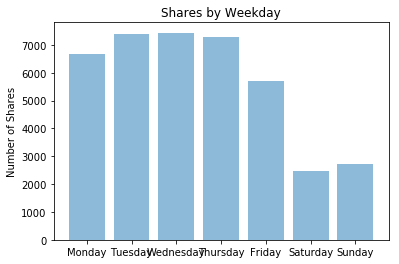

In [76]:
#extracting weekdays
#dataweekends=data.iloc[:, 29:36,61]
#print(dataweekends)
#dfw = dataweekends.groupby('weekday_is_monday')
#print(dfw)
#extracting no of shares

#print(df.loc['weekday_is_monday'].sum())
#df.loc[df[1],'weekday_is_monday'].sum()
 
Total1 = df['weekday_is_monday'].sum()
print (Total1)
Total2 = df['weekday_is_tuesday'].sum()
print (Total2)
Total3 = df['weekday_is_wednesday'].sum()
print (Total3)
Total4 = df['weekday_is_thursday'].sum()
print (Total4)
Total5 = df['weekday_is_friday'].sum()
print (Total5)
Total6 = df['weekday_is_saturday'].sum()
print (Total6)
Total7 = df['weekday_is_sunday'].sum()
print (Total7)

y = [Total1, Total2, Total3, Total4, Total5, Total6, Total7]

 
objects = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday')
y_pos = np.arange(len(objects))

 
plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Shares')
plt.title('Shares by Weekday')
plt.savefig('fig1.png')

In [45]:
print("Type of data: {}".format(type(df)))
print("Type of data: {}".format(type(data)))
print("Type of data: {}".format(type(target)))

Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.series.Series'>


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [47]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (29733, 58)
y_train shape: (29733,)


In [48]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (9911, 58)
y_test shape: (9911,)


2099
7057
6258
2323
7346
8427


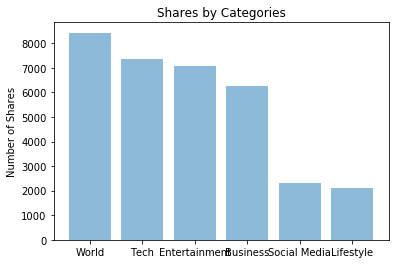

In [78]:
#extracting weekdays
#dataweekends=data.iloc[:, 29:36,61]
#print(dataweekends)
#dfw = dataweekends.groupby('weekday_is_monday')
#print(dfw)
#extracting no of shares

#print(df.loc['weekday_is_monday'].sum())
#df.loc[df[1],'weekday_is_monday'].sum()
 
Total1 = df['data_channel_is_lifestyle'].sum()
print (Total1)
Total2 = df['data_channel_is_entertainment'].sum()
print (Total2)
Total3 = df['data_channel_is_bus'].sum()
print (Total3)
Total4 = df['data_channel_is_socmed'].sum()
print (Total4)
Total5 = df['data_channel_is_tech'].sum()
print (Total5)
Total6 = df['data_channel_is_world'].sum()
print (Total6)


y = [Total6, Total5, Total2, Total3, Total4, Total1]

 
objects = ('World','Tech','Entertainment', 'Business', 'Social Media','Lifestyle')
y_pos = np.arange(len(objects))

 
plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Shares')
plt.title('Shares by Categories')
 
plt.savefig('fig1.png')


  

In [50]:
plt.style.use('seaborn-white')

In [102]:
d=df[df['shares'] < 40000]
print(d)
d.shape

                                                     url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...        731   
1      http://mashable.com/2013/01/07/apple-40-billio...        731   
2      http://mashable.com/2013/01/07/ap-samsung-spon...        731   
3      http://mashable.com/2013/01/07/astronaut-notre...        731   
4       http://mashable.com/2013/01/07/att-u-verse-apps/        731   
5       http://mashable.com/2013/01/07/beewi-smart-toys/        731   
6      http://mashable.com/2013/01/07/bodymedia-armba...        731   
7       http://mashable.com/2013/01/07/canon-poweshot-n/        731   
8      http://mashable.com/2013/01/07/car-of-the-futu...        731   
9      http://mashable.com/2013/01/07/chuck-hagel-web...        731   
10     http://mashable.com/2013/01/07/cosmic-events-d...        731   
11      http://mashable.com/2013/01/07/crayon-creatures/        731   
12         http://mashable.com/2013/01/07/creature-cups/        731   
13    

(39355, 62)

(array([ 32984.,   3735.,   1202.,    549.,    348.,    204.,    152.,
            76.,     58.,     47.]),
 array([     1. ,   3990.9,   7980.8,  11970.7,  15960.6,  19950.5,
         23940.4,  27930.3,  31920.2,  35910.1,  39900. ]),
 <a list of 10 Patch objects>)

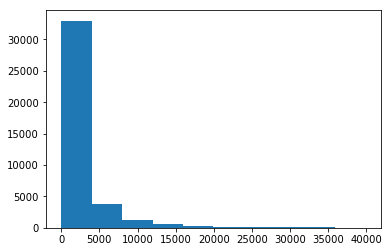

In [103]:
plt.hist(d['shares'])



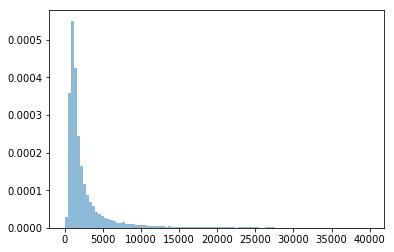

In [104]:
 plt.hist(d['shares'], bins=100, normed=True, alpha=0.5,
                histtype='stepfilled',
                edgecolor='none');

C:\Users\Kapila\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



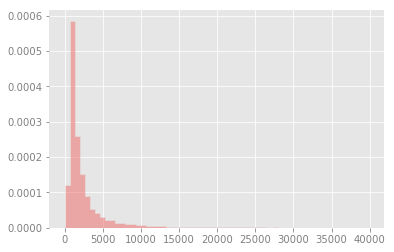

In [110]:
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

       # draw solid white grid lines
plt.grid(color='w', linestyle='solid')

       # hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

       # hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

       # lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    # control face and edge color of histogram
ax.hist(d['shares'],  bins=60, normed=True, alpha=0.5,
                histtype='stepfilled',
                 edgecolor='#E6E6E6', color='#EE6666');

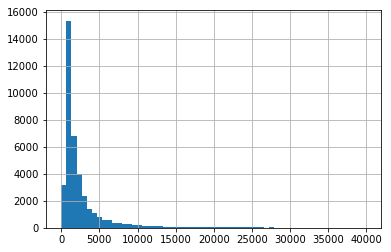

In [111]:
d['shares'].hist(bins=60)
plt.savefig('fig1.png')

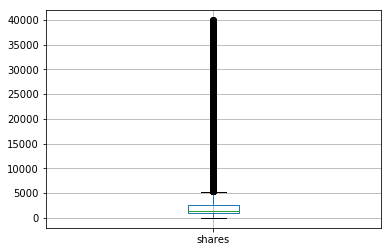

In [107]:
d.boxplot(column='shares')

In [108]:
d.columns.tolist()

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

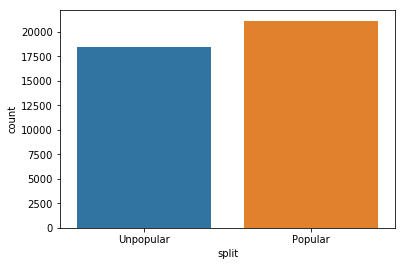

In [87]:
import seaborn as sns
sns.countplot(df['split'],label="Count of number of shares")
plt.savefig('fig1.png')